
"***Predictive Analysis and Insights on Car Attributes Using Machine Learning: <br>A Study with CarDekho Dataset***" <br>
Roll No.: 9156 <br>
Name: Shreeya N. Parab<br>
Class : TYCS - A<br>
Subject: Machine Learning<br>

# **1. Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
df = pd.read_csv("/content/9156Shreeya_Cardekhodataset.csv")

# **2. Understanding the Data**

In [7]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (15411, 14)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats       

In [9]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [10]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Unnamed: 0,0,0.0
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0


Observation : After inspecting the dataframe, no missing values found.

In [11]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [12]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


# **3. Exploratory Data Analysis**

In [13]:
# Set the "Road Ahead" theme for visualizations
sns.set_theme(style="whitegrid", palette="muted")
custom_palette = sns.color_palette(["#004AAD", "#008000", "#56B4E9", "#FF8C00", "#C70039"])

1. Correlation Between Vechicle Age and Selling Price

In [59]:
corr_age_price = df['vehicle_age'].corr(df['selling_price'])
print(f"Correlation between Vehicle Age and Selling Price: {corr_age_price:.2f}")

Correlation between Vehicle Age and Selling Price: -0.24


2. Fuel type VS Selling price.

In [73]:
avg_price_fuel = df.groupby('fuel_type')['selling_price'].mean()
avg_price_fuel = avg_price_fuel.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Fuel Type:")
print(avg_price_fuel)

Average Selling Price by Fuel Type:
fuel_type
CNG           ₹417,688
Diesel      ₹1,000,469
Electric    ₹1,853,500
LPG           ₹206,273
Petrol        ₹572,862
Name: selling_price, dtype: object


3. Relationship between km driven and Selling price.

In [84]:
correlation = df['km_driven'].corr(df['selling_price'])
print(f"Correlation Coefficient between KM Driven and Selling Price: {correlation:.4f}")
km_stats = df['km_driven'].describe()
km_stats = km_stats.apply(lambda x: f"{x:,.0f}" if isinstance(x, (int, float)) else x)
price_stats = df['selling_price'].describe()
price_stats = price_stats.apply(lambda x: f"₹{x:,.0f}" if isinstance(x, (int, float)) else x)

print("\n--- KM Driven Statistics ---")
print(km_stats)

print("\n--- Selling Price Statistics ---")
print(price_stats)

# Interpretation based on correlation
if correlation < 0:
    print("\nThere is a negative correlation, suggesting that cars with higher mileage tend to have lower selling prices.")
elif correlation > 0:
    print("\nThere is a positive correlation, suggesting that cars with higher mileage tend to have higher selling prices.")
else:
    print("\nThere is no correlation between KM Driven and Selling Price.")


Correlation Coefficient between KM Driven and Selling Price: -0.0800

--- KM Driven Statistics ---
count       15,411
mean        55,616
std         51,619
min            100
25%         30,000
50%         50,000
75%         70,000
max      3,800,000
Name: km_driven, dtype: object

--- Selling Price Statistics ---
count        ₹15,411
mean        ₹774,971
std         ₹894,128
min          ₹40,000
25%         ₹385,000
50%         ₹556,000
75%         ₹825,000
max      ₹39,500,000
Name: selling_price, dtype: object

There is a negative correlation, suggesting that cars with higher mileage tend to have lower selling prices.


4. Transmission type vs Selling Price

In [76]:
avg_price_transmission = df.groupby('transmission_type')['selling_price'].mean()
avg_price_transmission = avg_price_transmission.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Transmission Type:")
print(avg_price_transmission)

Average Selling Price by Transmission Type:
transmission_type
Automatic    ₹1,579,557
Manual         ₹565,285
Name: selling_price, dtype: object


5. Average Selling Price by Brand

In [77]:
avg_price_brand = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)
avg_price_brand = avg_price_brand.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Brand:")
print(avg_price_brand)

Average Selling Price by Brand:
brand
Ferrari          ₹39,500,000
Rolls-Royce      ₹24,200,000
Bentley           ₹9,266,667
Maserati          ₹6,100,000
Porsche           ₹5,161,190
Lexus             ₹5,146,500
Mercedes-AMG      ₹5,100,000
Land Rover        ₹3,823,902
Volvo             ₹3,729,700
BMW               ₹2,693,827
Jaguar            ₹2,643,034
Mercedes-Benz     ₹2,480,742
Mini              ₹2,182,647
Audi              ₹1,966,865
ISUZU             ₹1,897,500
Jeep              ₹1,795,805
MG                ₹1,752,947
Kia               ₹1,735,250
Toyota            ₹1,371,317
Isuzu             ₹1,355,000
Nissan              ₹955,364
Mahindra            ₹787,455
Skoda               ₹784,090
Force               ₹700,000
Tata                ₹683,535
Ford                ₹645,224
Honda               ₹617,757
Hyundai             ₹576,154
Volkswagen          ₹516,547
Maruti              ₹487,089
Renault             ₹440,985
Datsun              ₹320,518
Name: selling_price, dtype: object

6. Distribution of selling_price based on vehicle_age

In [79]:
# Analyze how selling_price varies with vehicle age
avg_price_age = df.groupby('vehicle_age')['selling_price'].mean()
avg_price_age = avg_price_age.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Vehicle Age:")
print(avg_price_age)

Average Selling Price by Vehicle Age:
vehicle_age
0     ₹2,230,000
1     ₹1,096,977
2     ₹1,143,023
3       ₹977,095
4       ₹950,943
5       ₹818,893
6       ₹728,515
7       ₹699,076
8       ₹625,945
9       ₹592,466
10      ₹496,148
11      ₹426,238
12      ₹318,290
13      ₹278,485
14      ₹260,682
15      ₹188,376
16      ₹126,240
17      ₹156,471
18      ₹125,000
19       ₹74,000
21       ₹73,333
22       ₹70,000
25    ₹1,000,000
29       ₹60,000
Name: selling_price, dtype: object


7. Engine capacity vs Selling Price

In [80]:
# Compute average selling price by engine capacity (grouped)
df['engine_bins'] = pd.cut(df['engine'], bins=[0, 1000, 1500, 2000, 2500, 3000, 4000], labels=[
    '0-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-4000'])
avg_price_engine = df.groupby('engine_bins')['selling_price'].mean()
avg_price_engine = avg_price_engine.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Engine Capacity:")
print(avg_price_engine)

Average Selling Price by Engine Capacity:
engine_bins
0-1000         ₹328,774
1000-1500      ₹561,974
1500-2000    ₹1,278,281
2000-2500    ₹1,203,003
2500-3000    ₹2,100,115
3000-4000    ₹3,762,451
Name: selling_price, dtype: object


8. Mileage vs Selling Price

In [81]:
# Compute average selling price by mileage (grouped)
df['mileage_bins'] = pd.cut(df['mileage'], bins=[0, 10, 15, 20, 25, 30, 50], labels=[
    '0-10', '10-15', '15-20', '20-25', '25-30', '30+'])
avg_price_mileage = df.groupby('mileage_bins')['selling_price'].mean()
avg_price_mileage = avg_price_mileage.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Mileage Range:")
print(avg_price_mileage)

Average Selling Price by Mileage Range:
mileage_bins
0-10     ₹4,329,519
10-15    ₹1,431,519
15-20      ₹775,138
20-25      ₹573,799
25-30      ₹565,935
30+        ₹356,340
Name: selling_price, dtype: object


9. Seller type vs Selling Price


In [82]:
# Compute average selling price by seller type
avg_price_seller = df.groupby('seller_type')['selling_price'].mean()
avg_price_seller = avg_price_seller.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Seller Type:")
print(avg_price_seller)

Average Selling Price by Seller Type:
seller_type
Dealer              ₹872,506
Individual          ₹617,880
Trustmark Dealer    ₹571,960
Name: selling_price, dtype: object


10. Selling Price for Different Seat Configurations

In [83]:
# Compute average selling price by seating capacity
avg_price_seats = df.groupby('seats')['selling_price'].mean()
avg_price_seats = avg_price_seats.apply(lambda x: f"₹{x:,.0f}")
print("Average Selling Price by Seat Configuration:")
print(avg_price_seats)

Average Selling Price by Seat Configuration:
seats
0      ₹634,500
2    ₹4,124,286
4    ₹3,974,597
5      ₹694,254
6      ₹646,787
7    ₹1,164,031
8      ₹929,360
9      ₹648,000
Name: selling_price, dtype: object


# **4.VISUALIZATION QUESTIONS**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customizing the "Road Ahead" Theme
custom_palette = sns.color_palette("muted")

1. Bar Plot: Distribution of selling_price by brand

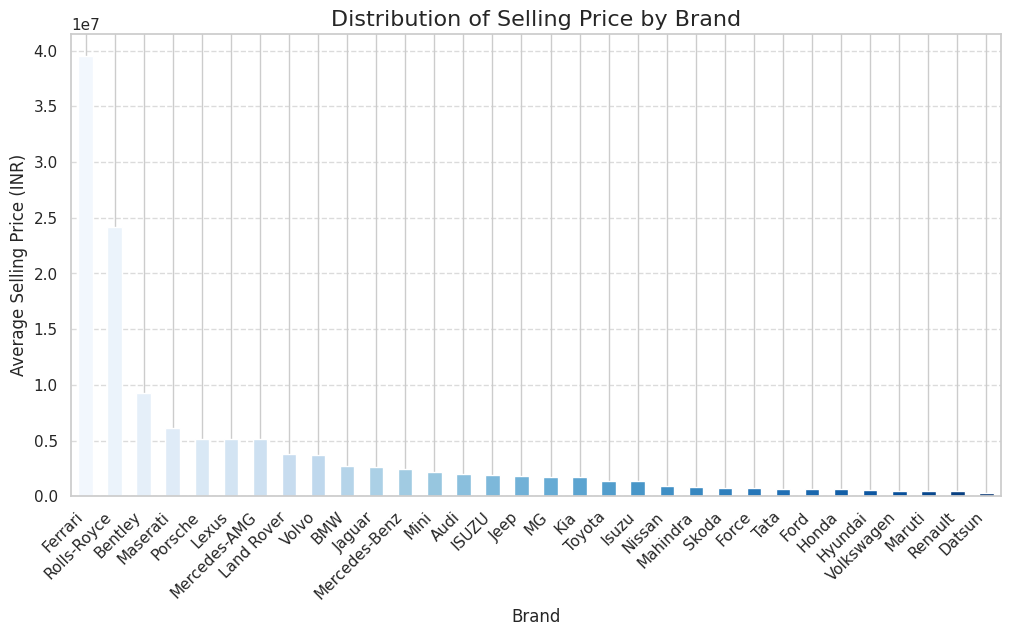

In [41]:

plt.figure(figsize=(12, 6))
avg_price_by_brand = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)
avg_price_by_brand.plot(kind='bar', color=sns.color_palette("Blues", len(avg_price_by_brand)))
plt.title("Distribution of Selling Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Selling Price (INR)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Scatter Plot: Relationship between vehicle_age and selling_price

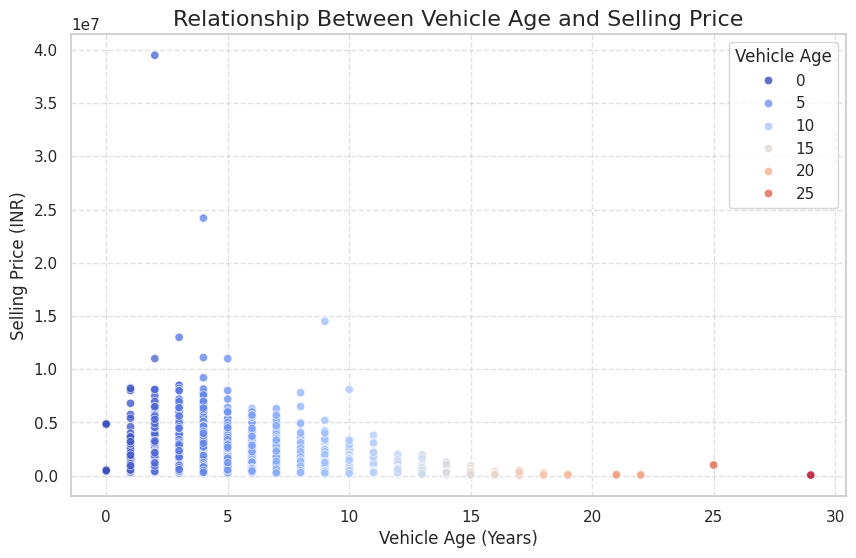

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='vehicle_age', y='selling_price',
    hue='vehicle_age', palette="coolwarm", alpha=0.8
)
plt.title("Relationship Between Vehicle Age and Selling Price", fontsize=16)
plt.xlabel("Vehicle Age (Years)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.legend(title="Vehicle Age", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


3. Histogram: Distribution of selling_price

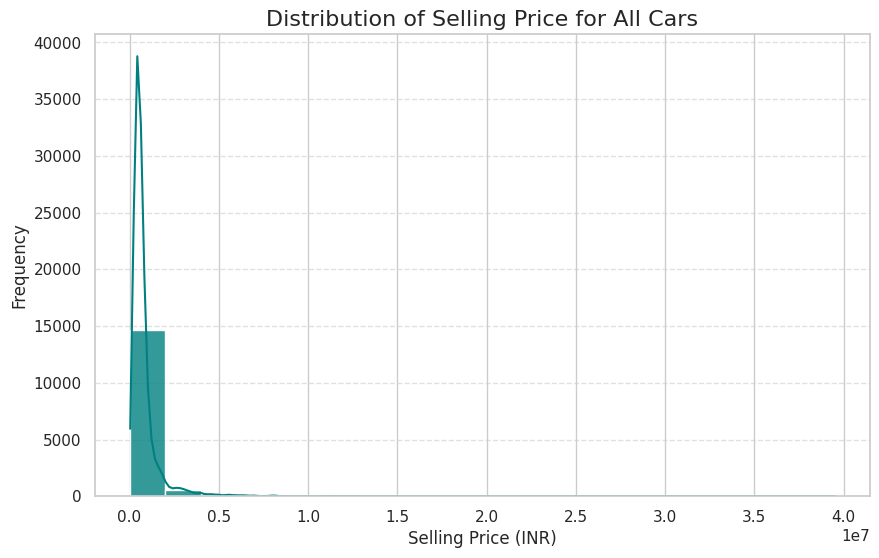

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=20, kde=True, color="teal", alpha=0.8)
plt.title("Distribution of Selling Price for All Cars", fontsize=16)
plt.xlabel("Selling Price (INR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

4. Box Plot: Compare selling_price by fuel_type

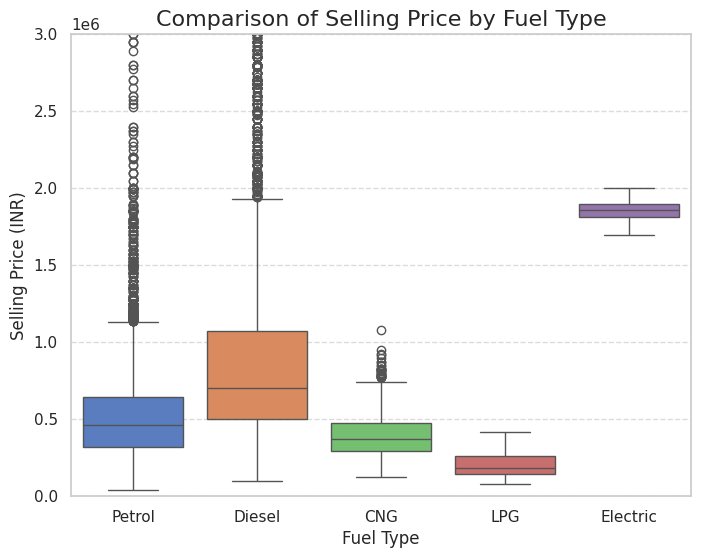

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fuel_type', y='selling_price', palette=custom_palette)
plt.title("Comparison of Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 3_000_000)
plt.show()

 5. Pie Chart: Proportion of cars by seller_type

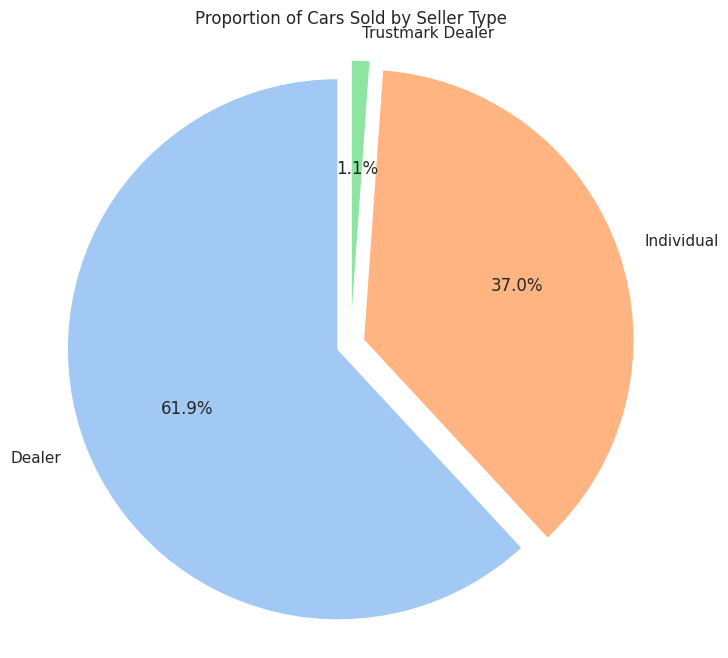

In [49]:
# Generate seller counts
plt.figure(figsize=(8, 8))
seller_counts = df['seller_type'].value_counts()

# Adjust explode to match the number of categories
explode_values = [0.05] * len(seller_counts)  # Explode all slices slightly

# Create the pie chart
plt.pie(
    seller_counts,
    labels=seller_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    explode=explode_values  # Ensure the explode array matches the number of categories
)

plt.title("Proportion of Cars Sold by Seller Type", fontsize=12)
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()


6. Scatter Plot: Engine Capacity vs Selling Price, colored by Fuel Type

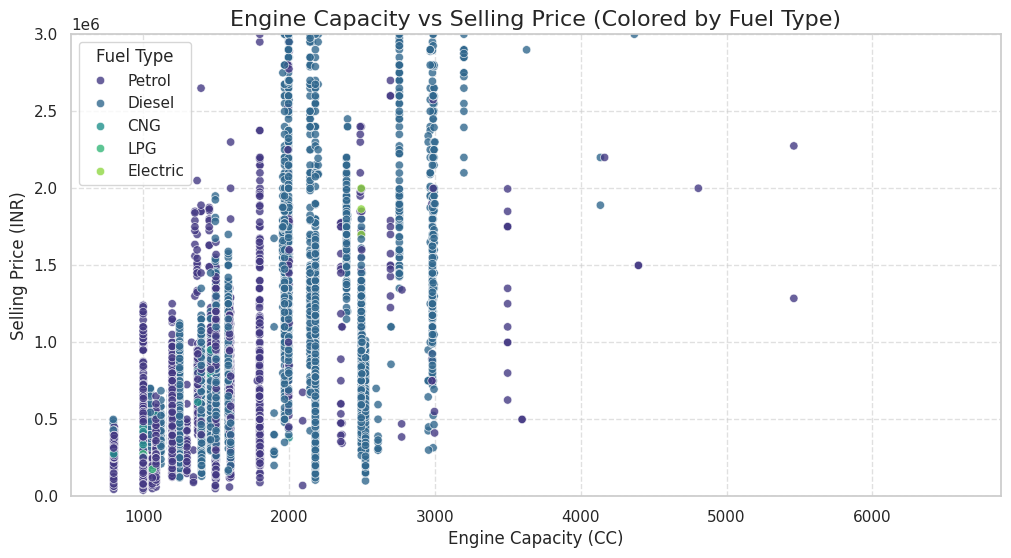

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, x='engine', y='selling_price', hue='fuel_type',
    palette="viridis", alpha=0.8
)
plt.title("Engine Capacity vs Selling Price (Colored by Fuel Type)", fontsize=16)
plt.xlabel("Engine Capacity (CC)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.legend(title="Fuel Type", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 3_000_000)
plt.show()

7. Bar Plot: Average Selling Price by Transmission Type

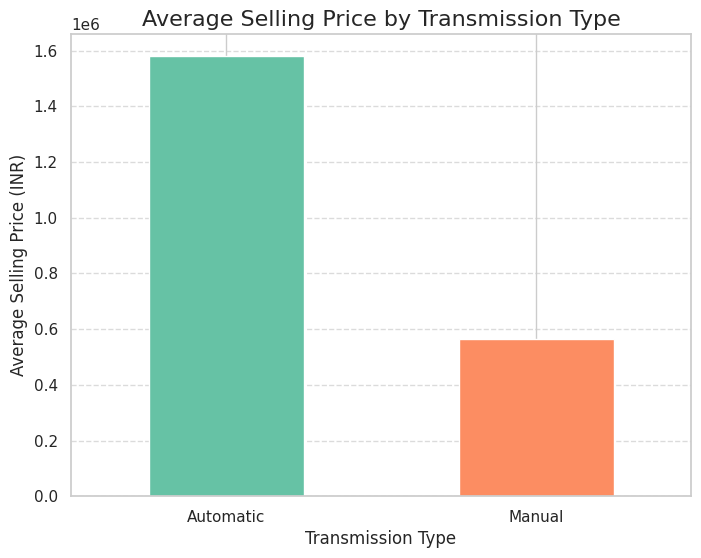

In [54]:
plt.figure(figsize=(8, 6))
avg_price_by_transmission = df.groupby('transmission_type')['selling_price'].mean()
avg_price_by_transmission.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Average Selling Price by Transmission Type", fontsize=16)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Average Selling Price (INR)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

8. Heatmap: Correlations between Key Variables

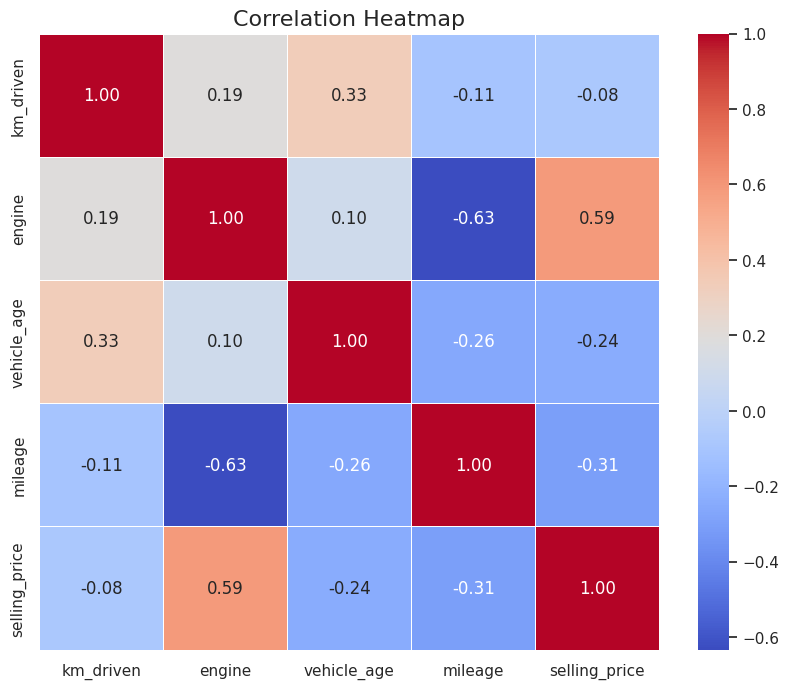

In [55]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['km_driven', 'engine', 'vehicle_age', 'mileage', 'selling_price']].corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

9. Bar Plot: Number of Cars Listed by Brand

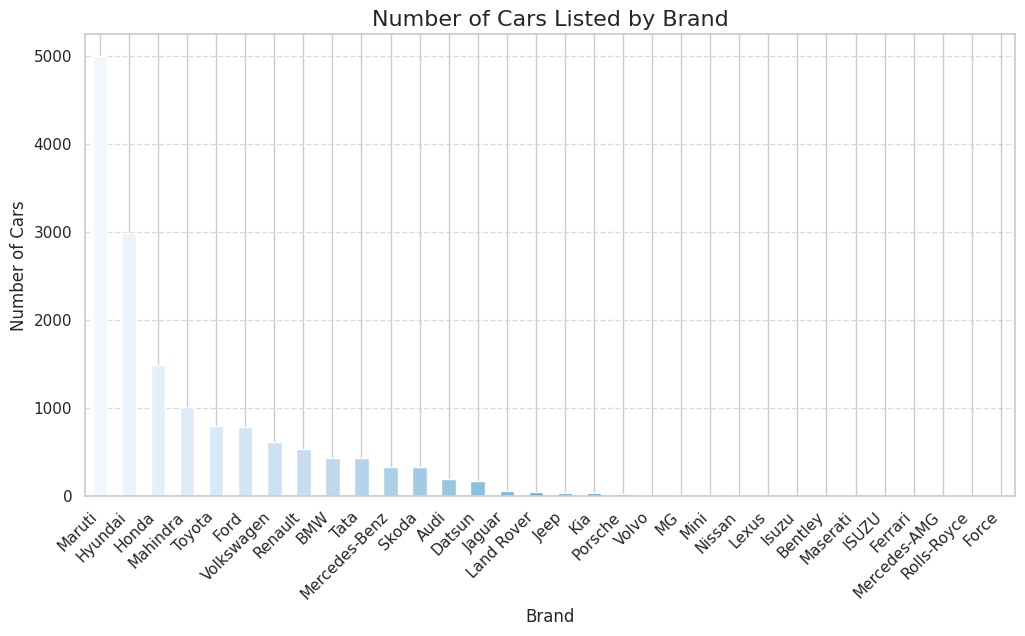

In [56]:
plt.figure(figsize=(12, 6))
brand_counts = df['brand'].value_counts()
brand_counts.plot(kind='bar', color=sns.color_palette("Blues", len(brand_counts)))
plt.title("Number of Cars Listed by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

10. Line Graph: Selling Price Trend with Vehicle Age

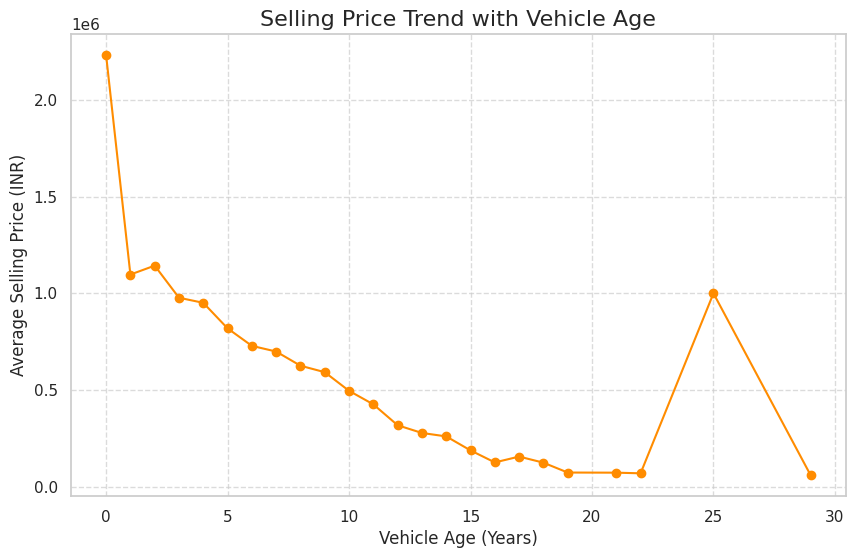

In [57]:
plt.figure(figsize=(10, 6))
avg_price_by_age = df.groupby('vehicle_age')['selling_price'].mean()
avg_price_by_age.plot(kind='line', color="darkorange", marker='o')
plt.title("Selling Price Trend with Vehicle Age", fontsize=16)
plt.xlabel("Vehicle Age (Years)", fontsize=12)
plt.ylabel("Average Selling Price (INR)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# **5. MACHINE LEARNING MODEL**

**MODEL TRAINING**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB
None
K-Means model saved as 'kmeans_model.pkl'.

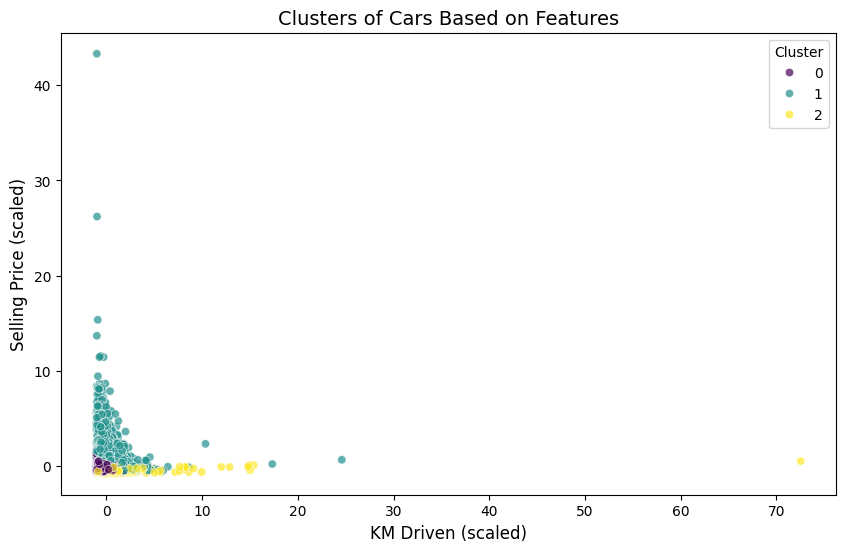

New Data Predictions:
   km_driven  selling_price  vehicle_age  engine  mileage  Cluster
0      40000         500000            3    1200       20        0
1      60000         300000            5    1500       15        0
2     120000         200000            8    1000       25        2


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/9156Shreeya_Cardekhodataset.csv"
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future decoding if needed

# Feature selection
features = ['km_driven', 'selling_price', 'vehicle_age', 'engine', 'mileage']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Training the K-Means Model
n_clusters = 3  # Define number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Save the trained model
joblib.dump(kmeans, "kmeans_model.pkl")
print("K-Means model saved as 'kmeans_model.pkl'.")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'.")

# 3. Predict clusters for the training data
df['Cluster'] = kmeans.predict(X_scaled)

# Evaluate clustering quality
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

# 4. Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0],  # km_driven (scaled)
    y=X_scaled[:, 1],  # selling_price (scaled)
    hue=df['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title("Clusters of Cars Based on Features", fontsize=14)
plt.xlabel("KM Driven (scaled)", fontsize=12)
plt.ylabel("Selling Price (scaled)", fontsize=12)
plt.legend(title="Cluster")
plt.show()

# 5. Use the model to predict clusters for new data points
new_data = pd.DataFrame({
    'km_driven': [40000, 60000, 120000],
    'selling_price': [500000, 300000, 200000],
    'vehicle_age': [3, 5, 8],
    'engine': [1200, 1500, 1000],
    'mileage': [20, 15, 25]
})

# Standardize new data
new_data_scaled = scaler.transform(new_data)

# Predict clusters for new data
new_clusters = kmeans.predict(new_data_scaled)
new_data['Cluster'] = new_clusters
print("New Data Predictions:")
print(new_data)


**MODEL OUTPUT: CLUSTER PREDICTION**

In [85]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model and scaler
kmeans = joblib.load("kmeans_model.pkl")
scaler = joblib.load("scaler.pkl")

# Function to take user input
def get_user_input():
    print("\nEnter car details for clustering:")
    try:
        km_driven = float(input("Enter KM Driven: "))
        selling_price = float(input("Enter Selling Price (in INR): "))
        vehicle_age = int(input("Enter Vehicle Age (in years): "))
        engine = float(input("Enter Engine Capacity (in cc): "))
        mileage = float(input("Enter Mileage (in km/l): "))
        return pd.DataFrame([{
            'km_driven': km_driven,
            'selling_price': selling_price,
            'vehicle_age': vehicle_age,
            'engine': engine,
            'mileage': mileage
        }])
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return None

# Interactive loop for predictions
while True:
    # Get user input
    user_data = get_user_input()
    if user_data is None:
        continue

    # Standardize user input
    user_data_scaled = scaler.transform(user_data)

    # Predict cluster
    cluster = kmeans.predict(user_data_scaled)[0]

    # Display cluster result
    print("\n### Predicted Cluster ###")
    print(f"The car belongs to Cluster {cluster}.")
    print("\n#########################\n")

    # Option to continue or exit
    cont = input("Do you want to predict another car? (yes/no): ").strip().lower()
    if cont != 'yes':
        print("Thank you! Exiting...")
        break



Enter car details for clustering:
Enter KM Driven: 45000
Enter Selling Price (in INR): 500000
Enter Vehicle Age (in years): 5
Enter Engine Capacity (in cc): 1200
Enter Mileage (in km/l): 18

### Predicted Cluster ###
The car belongs to Cluster 0.

#########################

Do you want to predict another car? (yes/no): yes

Enter car details for clustering:
Enter KM Driven: 90000
Enter Selling Price (in INR): 300000
Enter Vehicle Age (in years): 8
Enter Engine Capacity (in cc): 1500
Enter Mileage (in km/l): 15

### Predicted Cluster ###
The car belongs to Cluster 2.

#########################

Do you want to predict another car? (yes/no): no
Thank you! Exiting...
